In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img = cv2.imread('images/K5.png')
imgClone = np.copy(img)
height, width, channel = img.shape
# cv2.imshow('frame1', img)
# cv2.waitKey(0)
# cv2.destroyAllWindow()

In [3]:
Z = img.reshape((-1,3))
Z = np.float32(Z)

In [4]:
iterations = 100
epsilon = 1.0

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, iterations, epsilon)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [5]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

print(label.flatten().reshape((height,width)))

newCenter = center.reshape((1,-1,3))
grayCenter = cv2.cvtColor(newCenter, cv2.COLOR_BGR2GRAY)
print(grayCenter)
print(center)

[[2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 ...
 [2 2 2 ... 2 2 0]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 1 1 2]]
[[217  70 125]]
[[216 217 217]
 [ 65  74  63]
 [119 126 124]]


In [6]:
# cv2.imshow('res2',res2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

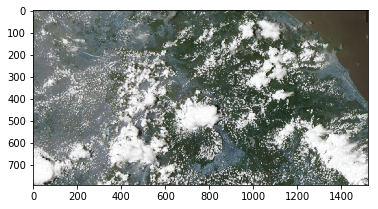

In [7]:
plt.imshow(img)

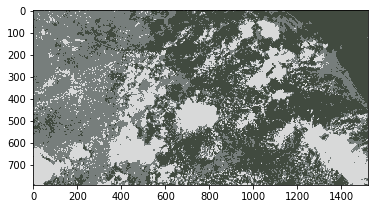

In [8]:
plt.imshow(res2)

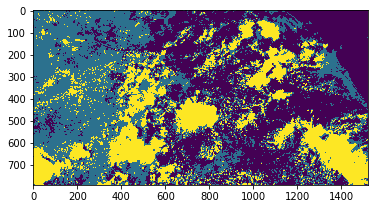

In [ ]:
gray = cv2.cvtColor(res2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [ ]:
# cv2.imshow('frame2', gray)
# cv2.waitKey(0)
# cv2.destroyAllWindow()

In [ ]:
imgClone[np.where((res2 >= center[1]).all(axis = 2))] = [0,33,166]
cv2.imshow('frame3', gray)
cv2.waitKey(0)
cv2.destroyAllWindow()